This week we started discussing some **Unsupervised Learning** algorithms, which are methods to help us find **structure** within a dataset. We specifically started talking about **dimensionality reduction algorithms**, which are techniques to look for **low dimensional structure**. That is, we may have a data point that can be described by $N$ **descriptors** (that is, a point in $\mathbb R^N$), but when you take several such points together, we see that they don't fully occupy the space -- they may lie on a plane, or a line, or on a low-dimensional manifold. One reason this may occur is that what we may choose to describe our data with a set of descriptors that are natural to us as humans, but there can be lots of relationships between the descriptors that reflect some sort of physical law or correlation. 

If our data points are 2 or 3 dimensional (i.e. if our data is described by 2 or 3 descriptors), it's easy for us as humans to plot the data and see this relationship outright. When the data is higher dimensions, it becomes trickier. You can imagine, for example plotting the data with respect to a few descriptors at a time, but this gets overwhelming quickly due to the curse of dimensionality. The more descriptors we have, the more pairwise, or triples of descriptors we must consider when trying to plot and analyze the data manually.

Alternatively, we can use these dimensionality reduction algorithms to automatically find and identify low dimensional structure. For example, we as humans may choose to describe a material by a set of 20 descriptors, but if we gather enough data described in this manner, we may discover some lower dimensional structure. Ideally, what we can learn is a mapping from a high dimension **descriptor vector** $\boldsymbol x \in \mathbb R^N$ to a lower dimensional representation $\boldsymbol z \in \mathbb R^n$ often called a **feature vector** (or sometimes called a **latent feature vector**), where $n \ll N$.

The idea behind a feature vector is that it is informationally efficient representation of the original set of descriptors. That is, that the individual components $\boldsymbol z = (z_1, z_2, ..., z_n)$ of a feature vector are as independent as possible. In a vague way, this means that there is very little information overlap between what the $z_i$ are describing. 

For **linear** methods like PCA, the $z_i$ are a linear combination of the $x_i$. In this way, we think of the feature vectors lie on a low dimensional linear subspace (a plane, a line, a hypercube). Because we are taking a linear combination of the $x_i$, it is usually easier to explain or understand what the $z_i$ actually represent as a physical quantity. 

For **nonlinear** methods -- also called **manifold methods** -- we do not assume that the feature vectors $\boldsymbol z$ lie on some linear subspace. Instead, the low dimensional surface (or *manifold*) on which the feature vectors lie is a bit complicated. Here the $z_i$ and $x_i$ have a complex relationship, meaning it becomes harder to intepret what the features $z_i$ mean.

Regardless of the method, these dimensionality reduction algorithms are useful for two main tasks:

1. By mapping to 1, 2 or 3 dimensions, we can make plots and visualize high dimensional data. This is a very useful exercise and is one of the first things you should do when you receive new data -- **Always look at the data**. This is one of the most important rules of data science. 

2. For the regression and classification models we'll consider later on in the class, we must have data to train such models. The amount of data needed to properly train these models is directly related to the dimensionality of the data. As a general rule of thumb, more data is required for every "input" feature considered by the model. As we'll see later in the course, one way to deal without having enough data to train an accurate model is to settle for a lower-order model based on reduced-dimensional input to prevent issues such as overfitting.

In this notebook, we'll focus mostly on this first point, and the more general exercise of looking at the data -- often called **Exploratory Data Analysis** (EDA) -- for which dimensionality reduction plays a key part. EDA involves making plots and calculating some statistics in order to explore and test hypothesis about the data and the procceses the data represents.

# Loading a Data file

The first thing we must have to explore data is the data itself. In this note (and throughout most of this class), we'll assume that data files are located in text files -- though we'll explore other ways of obtained data next semester.

In the `data` folder, there is a data text file called `JAHANMI2.txt`. This is a data file obtained from the [NIST webpage on Exploratory Data analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm), from which we base a few of the examples presented in this note. This data file is organized by rows. That is, each row of the text file corresponds to a single data point, with each column of the data file corresponding to a different descriptor. The descriptors of this specific dataset are given by:

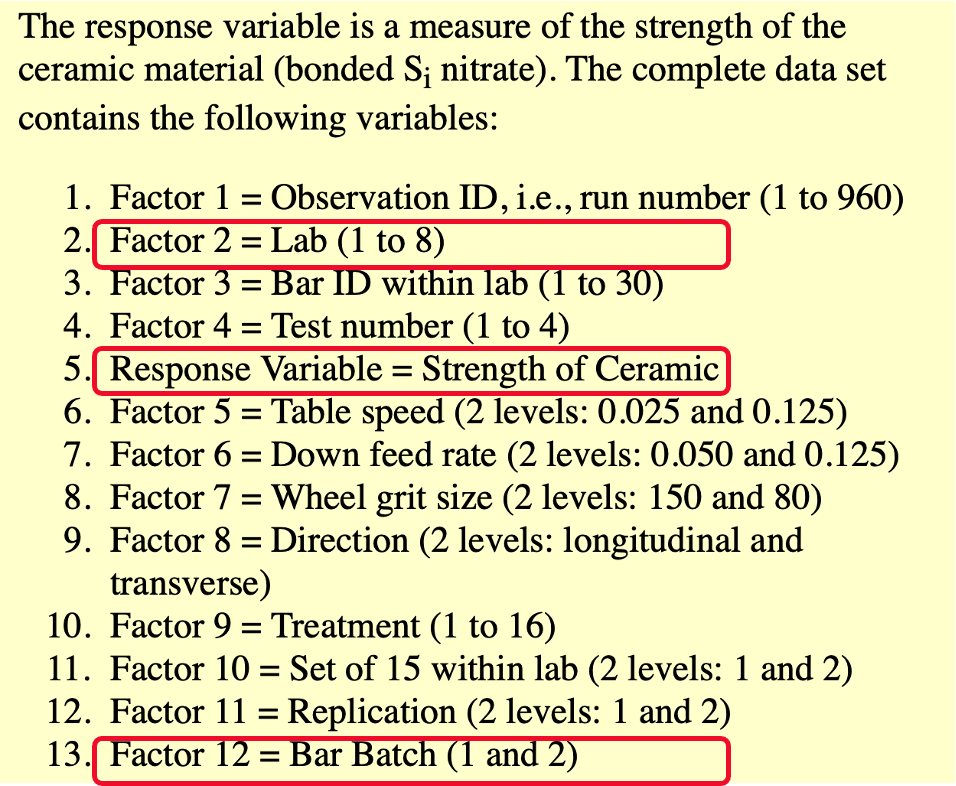

In [ ]:
data_file_name = "data/JAHANMI2.txt"

with open(data_file_name, 'r') as fin:
    print(fin.read())